In [2]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# start = datetime.datetime.now() - datetime.timedelta(7)
# end = datetime.datetime.now()

# start = '2020-01-01'
# end = datetime.datetime.now()

df = yf.download('SPY, NVDA, AMD')
df

[*********************100%***********************]  3 of 3 completed


Price            Close                                High              \
Ticker             AMD        NVDA         SPY         AMD        NVDA   
Date                                                                     
1980-03-17    3.145833         NaN         NaN    3.302083         NaN   
1980-03-18    3.031250         NaN         NaN    3.125000         NaN   
1980-03-19    3.041667         NaN         NaN    3.083333         NaN   
1980-03-20    3.010417         NaN         NaN    3.062500         NaN   
1980-03-21    2.916667         NaN         NaN    3.020833         NaN   
...                ...         ...         ...         ...         ...   
2024-12-16  126.690002  132.000000  604.754578  127.760002  134.399994   
2024-12-17  125.019997  130.389999  602.262939  127.080002  131.589996   
2024-12-18  121.410004  128.910004  584.313416  127.750000  136.699997   
2024-12-19  118.879997  130.679993  584.133972  123.379997  134.029999   
2024-12-20  119.209999  134.699997  591.150024  121.860001  135.279999   

Price                          Low                                Open  \
Ticker             SPY         AMD        NVDA         SPY         AMD   
Date                                                                     
1980-03-17         NaN    3.125000         NaN         NaN    0.000000   
1980-03-18         NaN    2.937500         NaN         NaN    0.000000   
1980-03-19         NaN    3.020833         NaN         NaN    0.000000   
1980-03-20         NaN    3.010417         NaN         NaN    0.000000   
1980-03-21         NaN    2.906250         NaN         NaN    0.000000   
...                ...         ...         ...         ...         ...   
2024-12-16  605.741308  123.120003  130.419998  603.179921  126.010002   
2024-12-17  603.139992  123.150002  126.860001  600.867672  124.449997   
2024-12-18  604.375836  120.430000  128.279999  583.924709  125.430000   
2024-12-19  591.010851  118.449997  129.550003  583.884811  122.160004   
2024-12-20  595.750000  117.900002  128.220001  580.909973  118.000000   

Price                                 Volume                            
Ticker            NVDA         SPY       AMD         NVDA          SPY  
Date                                                                    
1980-03-17         NaN         NaN    219600          NaN          NaN  
1980-03-18         NaN         NaN    727200          NaN          NaN  
1980-03-19         NaN         NaN    295200          NaN          NaN  
1980-03-20         NaN         NaN    159600          NaN          NaN  
1980-03-21         NaN         NaN    130800          NaN          NaN  
...                ...         ...       ...          ...          ...  
2024-12-16  134.179993  603.967249  42090300  237951100.0   43695200.0  
2024-12-17  129.089996  602.163299  43314900  259410300.0   55773500.0  
2024-12-18  133.860001  601.953994  49724400  277444500.0  108248700.0  
2024-12-19  131.759995  589.376338  46160700  209719200.0   85919500.0  
2024-12-20  129.809998  581.770020  53366800  305207400.0  125535900.0  

[11287 rows x 15 columns]

<Axes: xlabel='Date'>

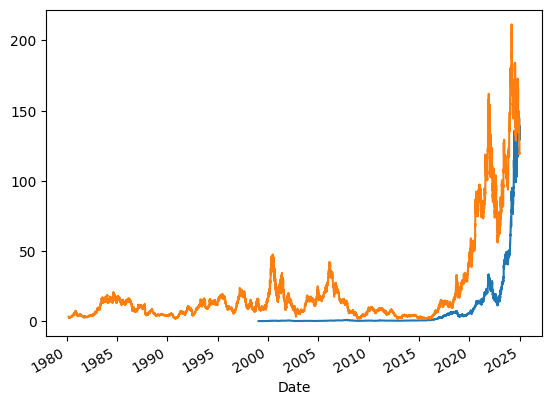

In [17]:
df['Close']['NVDA'].plot()
df['Close']['AMD'].plot()


<Axes: xlabel='Date'>

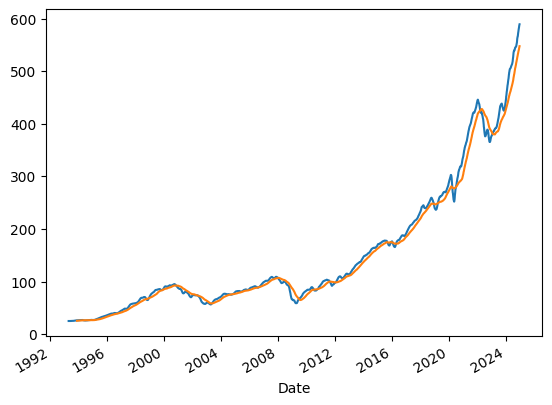

In [21]:
spy = df['Close']['SPY']
# spy.plot()

ma1 = spy.rolling(50).mean()
ma2 = spy.rolling(200).mean()
ma1.plot()
ma2.plot()

In [ ]:
entry = None
pnl = None
pnls = []
for i in range(len(spy)):
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            # calculate pnl for previous shory
            pnl = entry - spy.iloc[i]
            pnls.append(pnl)
        entry = spy.iloc[i] 
        print("entery long", pnl)

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) > 0:
        if entry:
            # calculate pnl for previous long
            pnl = spy.iloc[i] - entry
            pnls.append(pnl)

        entry = spy.iloc[i] 
        
        print("enter short", pnl)

enter short 23.259246826171875
entery long -1.5655841827392578
enter short 34.58221244812012
entery long -12.294361114501953
enter short 17.230934143066406
entery long 17.78564453125
enter short -1.29522705078125
entery long 9.422050476074219
enter short 12.230949401855469
entery long -1.5260086059570312
enter short 12.327072143554688
entery long -2.7608108520507812
enter short 14.746337890625
entery long 37.805870056152344
enter short 12.354293823242188
entery long -9.527938842773438
enter short 2.69549560546875
entery long -10.514846801757812
enter short 61.827552795410156
entery long -9.207305908203125
enter short -13.990142822265625
entery long -20.042709350585938
enter short 59.05030822753906
entery long -16.7779541015625
enter short -16.54486083984375
entery long -56.6029052734375
enter short 119.9259033203125
entery long 23.259246826171875


In [31]:
sum(pnls)

np.float64(262.5932159423828)